# Miles per Gallon

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


**1. Variables discrètes et continues**

In [4]:
disc = ["cylinders", "model_year", "origin", "name"]
cont = ["mpg", "displacement", "horsepower", "weight", "acceleration"]

**2. Analyse de la variable `mpg`**

In [5]:
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

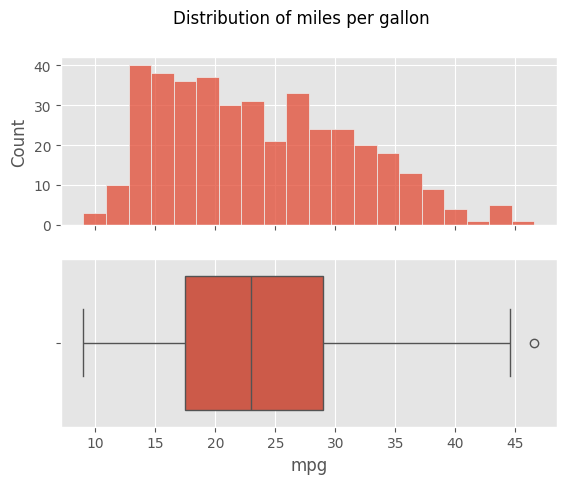

In [6]:
fig, axes = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="mpg", bins=20, ax=axes[0])
sns.boxplot(data=df, x="mpg", ax=axes[1])
fig.suptitle("Distribution of miles per gallon")
plt.show()

- Même si la plupart des véhicules ont une consommation d'essence modérée (entre 10 et 35 mpg), il existe toutefois de rares véhicules ayant une consommation supérieure à 40 mpg.
- En moyenne, les véhicules de ce jeu de données consomment un gallon de carburant sur 23.5 miles (37.8 km), avec un écart-type à 7.8 mpg.
- La plus faible consommation est de 46.6 mpg, et la plus élevée à 9 mpg.

**3. Analyse de la variable `cylinders`**

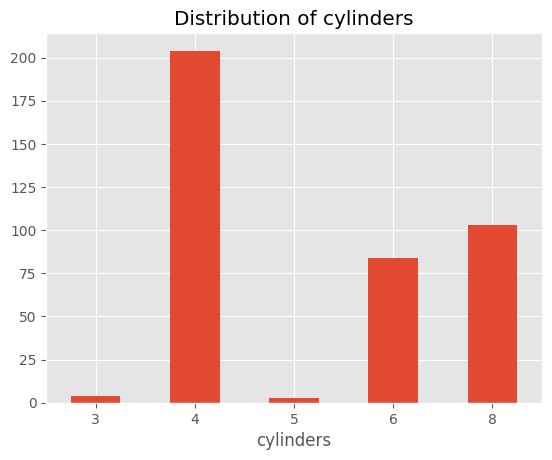

In [7]:
df["cylinders"].sort_values().value_counts(sort=False).plot(kind="bar", rot=0)
plt.xlabel("cylinders")
plt.title("Distribution of cylinders")
plt.show()

- La grande majorité des véhicules (~200) possèdent 4 cylindres.
- L'on en retrouve aussi de 8 et 6 cylindres (~100 et ~80 respectivement).
- Enfin, les nombres de cylindres impairs (3 et 5) sont très minoritaires.

**4. Analyse de la variable `origin`**

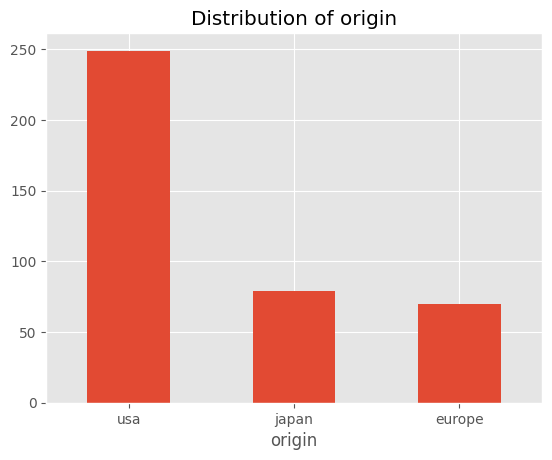

In [8]:
df["origin"].value_counts().plot(kind="bar", rot=0)
plt.xlabel("origin")
plt.title("Distribution of origin")
plt.show()

- Les véhicules étudiés proviennent de 3 origines : les USA, le Japon et l'Europe.
- L'écrasante majorité, soit environ 250 ont pour origine les Etats-Unis.
- Le Japon et l'Europe possèdent eux, environ 75 observations.

**5.1. Evolution de la consommation des véhicules `mpg` par rapport au nombre de chevaux `horsepower`**

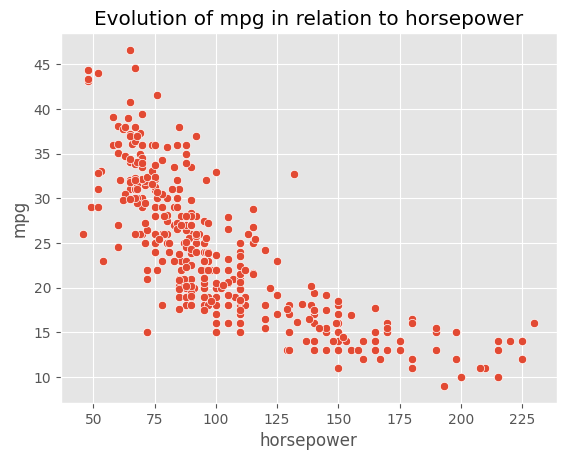

In [9]:
sns.scatterplot(data=df, x="horsepower", y="mpg")
plt.title("Evolution of mpg in relation to horsepower")
plt.show()

- La consommation des véhicules est visiblement une fonction croissante\* non linéaire mais plutôt quadratique ou exponentielle de la puissance fiscale.

\*Nous tenons à préciser que l'unité de mesure utilisée ici, le miles per gallon, est l'unité américaine de la consommation de carburant. Contrairement du système international, sa valeur indique la distance parcourue en miles pour un gallon de carburant consommé. Ainsi, un véhicule consommera davantage de carburant que son mpg sera faible.

**5.2. Ajout de la variable `model_year` à la visualisation précédente**

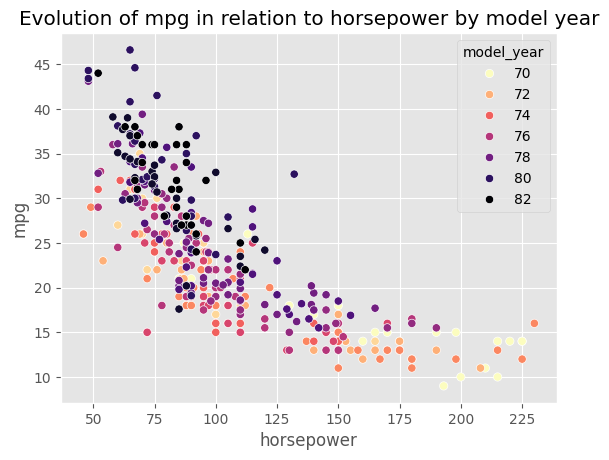

In [10]:
sns.scatterplot(data=df, x="horsepower", y="mpg", hue="model_year", palette="magma_r")
plt.title("Evolution of mpg in relation to horsepower by model year")
plt.show()

- Sur l'axe vertical, on remarque une tendance haussière du mpg - et donc baissière de la consommation de carburant - au fil des ans.
- Sur l'axe horizontal cette fois-ci, bien qu'il semble se dégager une réduction globale de la puissance fiscale au cours des année, l'on observe toutefois une omniprésence des modèles de véhicules produits entre 1972 et 1976.
- Cet intervalle de temps pourrait alors correspondre à une période de forte expérimentation dans l'industrie automobile, avec pour objectif de produire des véhicules moins énergivores.
- Nous concluons en faisant remarquer que même si les concessionnaires de ce temps on pu ramener la puissance fiscale dans l'intervalle [50, 100], la consommation des véhicules ainsi produits est restée relativement élevée (20-30 mpg), comparée aux modèles les plus performants (et similaires en termes de puissance fiscale) des années qui ont suivi (35-45 mpg).

**6.1. Evolution du poids moyen des voitures américaines**

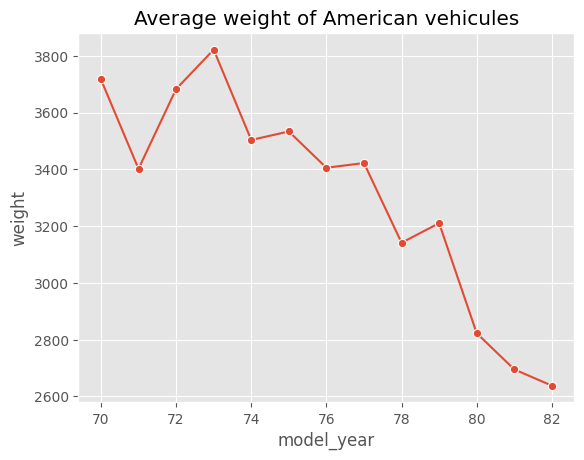

In [11]:
tmp_df_1 = (
    df.query("`origin` == 'usa'")
    .groupby(["origin", "model_year"])["weight"]
    .mean()
    .reset_index()
)
sns.lineplot(data=tmp_df_1, x="model_year", y="weight", marker="o")
plt.title("Average weight of American vehicules")
plt.show()

- Mis à part quelques exceptions, entre autres en 71 et 78, les concessionnaires américains ont tendance à produire des véhicules moins lourds avec le temps. On est passés de 3800 à 2600 (unitée inconnue).

**6.2. Poids moyen des voitures japonaises et européenes**

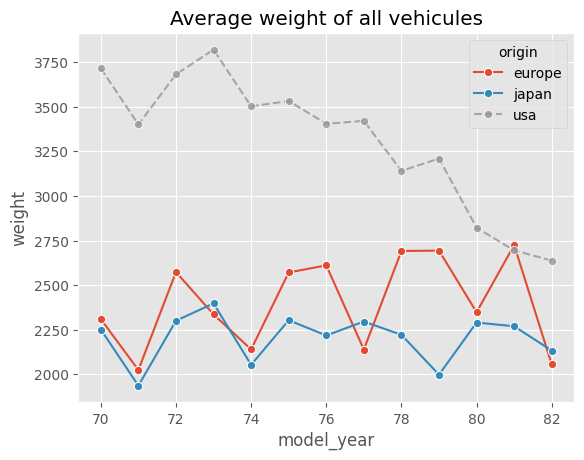

In [12]:
tmp_df_2 = (
    df.query("`origin` != 'usa'")
    .groupby(["origin", "model_year"])["weight"]
    .mean()
    .reset_index()
)
sns.lineplot(data=tmp_df_2, x="model_year", y="weight", hue="origin", marker="o")
sns.lineplot(data=tmp_df_1, x="model_year", y="weight", hue="origin", marker="o", alpha=0.8, linestyle="--", palette="Grays")
plt.title("Average weight of all vehicules")
plt.show()

- Contrairement aux américains, le poids des voitures en Europe oscille vraisemblablement au fil des années, les valeurs extrêmes étant 2000 et 2750.
- En ce qui concerne le Japon, on observe de faibles variations entre 2000 et 2400, mais on pourrait penser que cette variable reste relativement stable dans le temps.
- On note finalement que les américains ont toujours eu des voitures plus lourdes, et tenteraient en fait de se rapprocher du poids des voitures japonaises et européennes.

**7. Analyse de la relation entre le nombre de cylindres et l'année du modèle**

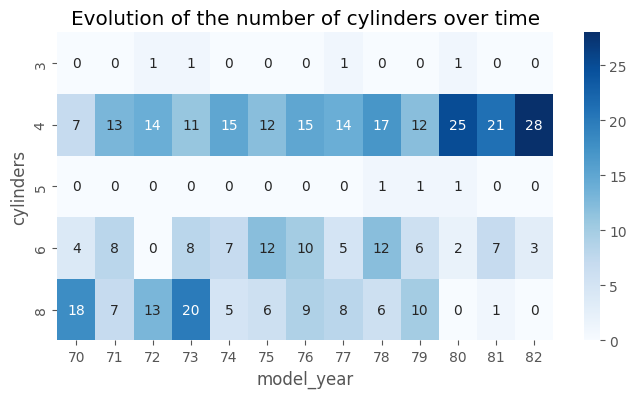

In [13]:
plt.figure(figsize=(8, 4))
sns.heatmap(pd.crosstab(df["cylinders"], df["model_year"]), annot=True, cmap="Blues")
plt.title("Evolution of the number of cylinders over time")
plt.show()

- Ces chiffres révèlent une tendance à réduire le nombre de cylindres des véhicules avec le temps.
- Egalement, on note une fois de plus que les cylindres pairs restent la norme, tandis que la potentielle expérimentation des cylindres impairs n'a visiblement pas donné de résultat concluant.

**8. Analyse de la relation entre le nombre de cylindres et l'année du modèle**

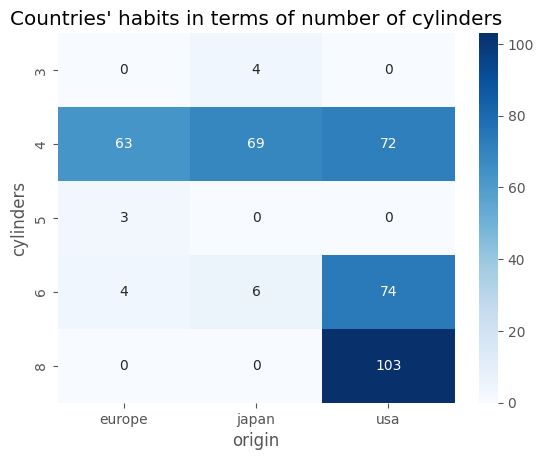

In [14]:
sns.heatmap(
    pd.crosstab(df["cylinders"], df["origin"]), annot=True, fmt="d", cmap="Blues"
)
plt.title("Countries' habits in terms of number of cylinders")
plt.show()

- D'après nos données, les USA sont les seuls à avoir un jour pensé aux moteurs à 8 cylindres.
- Ils restent les premiers promoteurs des 6 cylindres avec 74 voitures, mais cette fois-ci les autres se sont quand même prétés au jeu avec 4 et 6 voitures produites.
- On relève aussi qu'après l'expérimentation des tri cylindres en 72, 73 et 77 par les japonais, les européens ont également expérimenté les voitures à 5 cylindres entre 78 et 80.
- Enfin, comme relevé précédemment, les quadri cylindres sont la norme.

**9. Accélération moyenne des voitures des différents pays**

In [15]:
tmp_df_3 = df.groupby("origin")["acceleration"].mean().reset_index()
tmp_df_3

,origin,acceleration
0,europe,16.787143
1,japan,16.172152
2,usa,15.033735


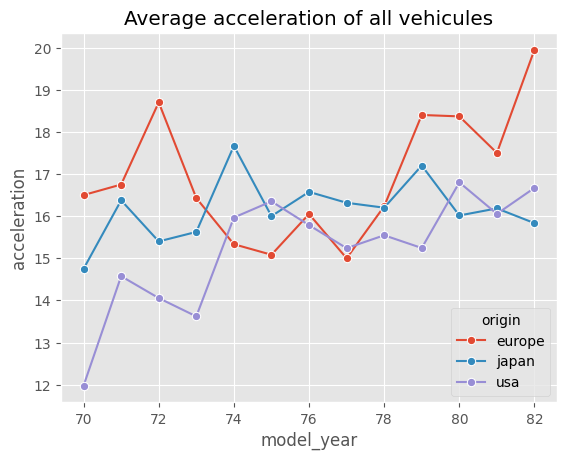

In [16]:
tmp_df_4 = df.groupby(["origin", "model_year"])["acceleration"].mean().reset_index()
sns.lineplot(data=tmp_df_4, x="model_year", y="acceleration", hue="origin", marker="o")
plt.title("Average acceleration of all vehicules")
plt.show()

- Des accélérations moyennes comprises entre 16.8 et 15, avec l'Europe en tête et les USA à la traîne.
- Lorsqu'on s'intéresse à la variable temps, on constate une période de difficultés pour l'Europe entre 73 et 77.
- Je Japon, lui, peine à faire progresser l'accélération de ses voitures depuis 1974.

**10. Accélération moyenne en 80**

In [17]:
tmp_df_5 = df.query("`model_year` == 80").groupby("origin")["acceleration"].mean().reset_index()
tmp_df_5

,origin,acceleration
0,europe,18.366667
1,japan,16.015385
2,usa,16.800000


In [18]:
tmp_df_5["acceleration"] - tmp_df_3["acceleration"]

0    1.579524
1   -0.156767
2    1.766265
Name: acceleration, dtype: float64

- Par rapport à la moyenne, on note un écart de +1.8 pour les USA et +1.6 en Europe, tandis que le Japon se retrouve en 1980 à -0.15 d'accélération par rapport à sa moyenne globale.

**11. Ensemble des phénomènes qui semblent se produire au fil du temps**

- Il apparaît que le quadri cylindres a fini par faire l'unanimité, malgré l'expérimentation des 8 et 6 cylindres par les américains surtout, et l'exploration des nombres impairs par les autres.
- On remarque également une amélioration de la consommation de carburant et de la puissance fiscale qui décroissent conjointement avec l'amélioration des techniques de conception automobile.
- La période 72-76 se caractérise en Europe par une vague d'expérimentations pas forcément concluantes; l'accélération des véhicules a connu une chute notoire (de 19 à 15), tandis que la puissance fiscale a été réduite mais sans réel impact sur la consommation de carburant. Après cette période, l'accélération des véhicules européennes a explosé pour atteindre la valeur de 20 en 1980.
- On note aussi les difficultés qu'éprouvent les concessionnaires japonais à faire évoluer l'accélération de leurs véhicules depuis 1974 (valeurs comprises entre 16 et 17).
- Les véhicules américains, très lourds au début des années 70 (3800), se rapprochent peu à peu en termes de poids des voitures européenes et japonaises (2600).